In [11]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [12]:
r = pd.read_csv("./jobsData_updated.csv")
r = pd.DataFrame(r)
r

,Year and month,Level As revised,Level As previously published,Level Difference,Over-the-month change As revised,Over-the-month change As previously published,Over-the-month change Difference
0,December 2024,158926,159536,-610,307,256,51
1,January 2025,143000,111000,-32000,143000,111000,-32000
2,February 2025,151000,102000,-49000,151000,102000,-49000
3,March 2025,228000,185000,-43000,228000,185000,-43000
4,April 2025,177000,177000,0,177000,177000,0


# Plot Jobs

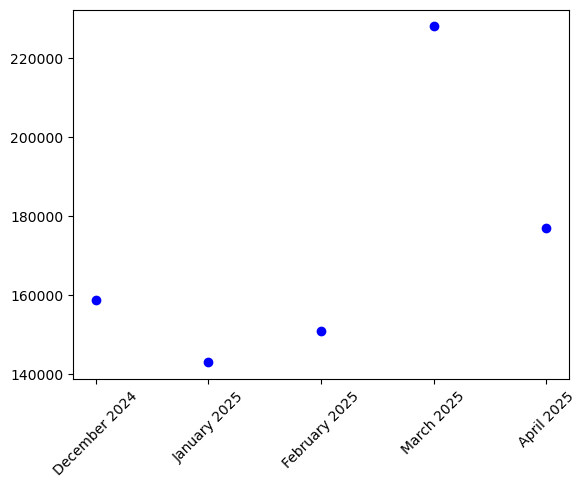

In [13]:
jobNums = r.iloc[:, 0]
months = r.iloc[:, 1]
plt.plot(jobNums, months, 'bo')
plt.xticks(rotation=45)
plt.show()

# Load January 2025 DataFrame

In [14]:
jan = pd.read_csv('./january2025.csv')
jan.loc[16] = ['Added Jobs', 143000]
jan

,Category,Data
0,Unemployment Rate,4.0%
1,Number of Unemployed People,6.8 million
2,Adult Men Unemployment Rate,3.7%
3,Adult Women Unemployment Rate,3.7%
4,Teenagers Unemployment Rate,11.8%
5,Whites Unemployment Rate,3.5%
6,Blacks Unemployment Rate,6.2%
7,Asians Unemployment Rate,3.7%
8,Hispanics Unemployment Rate,4.8%
9,Long-term Unemployed,1.4 million (21.1% of total unemployed)


In [15]:
df2 = r.copy()
columns = ['Level As revised', 'Level Difference', 'Over-the-month change As revised', 
           'Over-the-month change As previously published', 'Over-the-month change Difference']
df2 = df2.drop(columns, axis=1)
df2

,Year and month,Level As previously published
0,December 2024,159536
1,January 2025,111000
2,February 2025,102000
3,March 2025,185000
4,April 2025,177000


In [16]:
# df2.loc[12] = ['January 2025', jan.iloc[11, 2]]
df2.loc[len(df2)] = ['January 2025', jan.iloc[16, 1]]
df2

,Year and month,Level As previously published
0,December 2024,159536
1,January 2025,111000
2,February 2025,102000
3,March 2025,185000
4,April 2025,177000
5,January 2025,143000


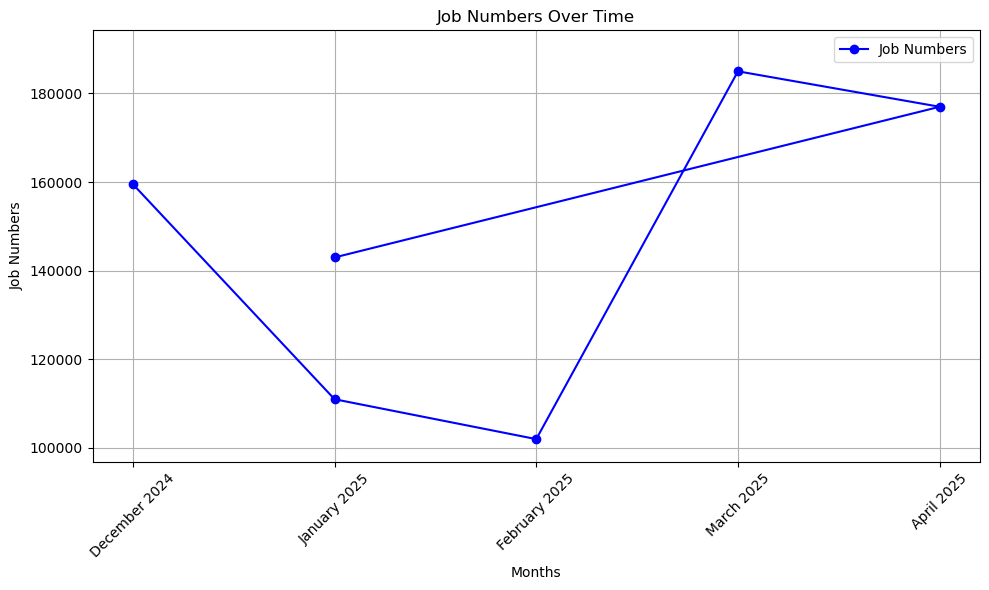

In [17]:
jobNums = df2.iloc[:, 1]
months = df2.iloc[:, 0]
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(months, jobNums, 'bo-', label='Job Numbers')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Months')
plt.ylabel('Job Numbers')
plt.title('Job Numbers Over Time')
plt.ylim(min(jobNums) * 0.95, max(jobNums) * 1.05)
plt.tight_layout()
plt.legend()
plt.show()

# Plot the Change in job increases

In [18]:
columnsToDrop = ['Level As revised', 'Level As previously published', 'Level Difference', 'Over-the-month change As revised', 
                 'Over-the-month change Difference']
df3 = r.drop(columnsToDrop, axis=1)

In [19]:
# df3.loc[12] = ['January 2025', (jan.iloc[16, 1] - r.iloc[11, 1])]
df3

,Year and month,Over-the-month change As previously published
0,December 2024,256
1,January 2025,111000
2,February 2025,102000
3,March 2025,185000
4,April 2025,177000


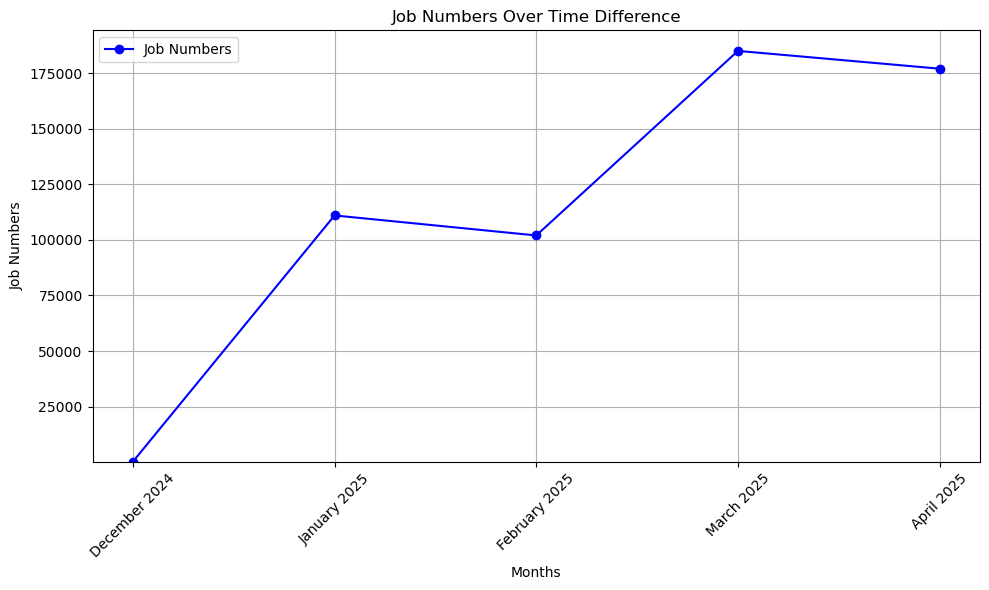

In [20]:
jobNums = df3.iloc[:, 1]
months = df3.iloc[:, 0]
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(months, jobNums, 'bo-', label='Job Numbers')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Months')
plt.ylabel('Job Numbers')
plt.title('Job Numbers Over Time Difference')
plt.ylim(min(jobNums) * 0.95, max(jobNums) * 1.05)
plt.tight_layout()
plt.legend()
plt.show()